# Exploratory Data Analysis of Pizza and its Nutritional values and Performing Ttest

                                                                            -  Thulasi Gabbita(NU01134)
                                                                            -  Shivakumar Jayaraman(KJ04412)

# Introduction:

As part of DATA-601 Final project, We have taken  a pizza restaurant dataset, comprising of types of pizzas sold by the restaurant, ingredients of each pizza, pizza sales in 1 year(2015) and merged with fruits and vegetables nutritional value dataset to perform Exploratory Data Analysis. 

#### Our problem statement is to find the nutrition facts of the pizzas sold by pizza restaurant and to recommend a holisticpizza with balanced macro nutrients 

## Dataset details:

1. Popular High Protein foods dataset containing macro nutrients details.

    source:https://www.kaggle.com/datasets/fydrose/macros-of-popular-high-protein-foods


2. Food and their calories dataset 

    source:https://www.kaggle.com/datasets/vaishnavivenkatesan/food-and-their-calories


3. Fruits and Vegetables along with their nutritional values

    source:https://www.kaggle.com/datasets/yoyoyloloy/fruits-and-vegetables-nutritional-values?select=fruits.csv


4. Pizza sales: 

    source: https://www.mavenanalytics.io/data-playground > Pizza Place Sales

# Assumptions made:

1. For each small pizza, each ingredient weight is 50gm, for medium size pizza, each ingredient weight is 100gm, large pizza - 150gm, xl pizza - 200gm, xxxl pizza - 300gm 
1. Different cheese types were normalized into 1 category
1. Only one person is eating the whole pizza
1. Sause or seasonings has no nutritional value
1. We have taken the ideal nutritional range as Carbs between 45% to 65%, fats 20% to 35%, protein 10% to 35%

    Reference : https://www.medicalnewstoday.com/articles/320773#what-is-a-low-carb-diet


In [1]:
#Importing all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import PorterStemmer
import re

# Loading datasets

In [2]:
od_df = pd.read_csv('Pizza_Place_Sales/pizza_sales/order_details.csv')
o_df = pd.read_csv('Pizza_Place_Sales/pizza_sales/orders.csv')
p_df = pd.read_csv('Pizza_Place_Sales/pizza_sales/pizzas.csv')

Fixing some encoding errors with `pizza_types.csv`

In [3]:
with open('Pizza_Place_Sales/pizza_sales/pizza_types.csv', 'rb') as f:
    text = f.read()
    text_list = list(text)
    for idx, chars in enumerate(text_list):
        if chars == 145:
            text_list.pop(idx)
    text = bytes(text_list)

In [4]:
with open("Pizza_Place_Sales/pizza_sales/pizza_types_corrected.csv", "wb") as binary_file:
    # Write bytes to file
    binary_file.write(text)

In [3]:
pt_df = pd.read_csv('Pizza_Place_Sales/pizza_sales/pizza_types_corrected.csv')

# Sanity Checks

## orders

In [4]:
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [5]:
# merge 'date' and 'time' together
o_df['order_time'] = o_df['date'] + ' ' + o_df['time']

In [6]:
o_df['order_time'] = pd.to_datetime(o_df['order_time'])

## order_details

In [7]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
od_df.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [9]:
od_df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

<AxesSubplot:xlabel='quantity', ylabel='Count'>

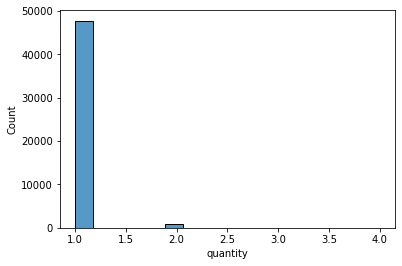

In [10]:
sns.histplot(od_df['quantity'])

## pizzas

In [11]:
p_df.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


## pizza_types

In [12]:
pt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [13]:
pt_df.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

### Pizza sales tabels are clean

# Cleaning datasets

In [14]:
pt_df['ingredients'] = pt_df['ingredients'].str.lower()

In [15]:
# Adding bread as an ingredient to all the pizzas. 
pt_df['ingredients'] = pt_df['ingredients'].apply(lambda x: x + ',' + 'wheat')

### Fetching unique pizza ingredients

Need to get all the relevant ingredients from other tables before cleaning this list further

In [16]:
pizza_ingredients = set()
def ingredients(line):
    pizza_ingredients.update(line.split(','))

In [17]:
pt_df['ingredients'].apply(lambda x: ingredients(x))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
Name: ingredients, dtype: object

## clean the ingredients into just their natural form

In [18]:
pizza_ingredients = list(pizza_ingredients)
for i,val in enumerate(pizza_ingredients):
    pizza_ingredients[i] = val.strip().lower()
pizza_ingredients = set(pizza_ingredients)

In [19]:
pizza_ingredients

{'alfredo sauce',
 'anchovies',
 'artichoke',
 'artichokes',
 'arugula',
 'asiago cheese',
 'bacon',
 'barbecue sauce',
 'barbecued chicken',
 'beef chuck roast',
 'blue cheese',
 'brie carre cheese',
 'calabrese salami',
 'capocollo',
 'caramelized onions',
 'chicken',
 'chipotle sauce',
 'chorizo sausage',
 'cilantro',
 'coarse sicilian salami',
 'corn',
 'eggplant',
 'feta cheese',
 'fontina cheese',
 'friggitello peppers',
 'garlic',
 'genoa salami',
 'goat cheese',
 'gorgonzola piccante cheese',
 'gouda cheese',
 'green olives',
 'green peppers',
 'italian sausage',
 'jalapeno peppers',
 'kalamata olives',
 'luganega sausage',
 'mozzarella cheese',
 'mushrooms',
 'nduja salami',
 'onions',
 'oregano',
 'pancetta',
 'parmigiano reggiano cheese',
 'pears',
 'peperoncini verdi',
 'pepperoni',
 'pesto sauce',
 'pineapple',
 'plum tomatoes',
 'prosciutto',
 'prosciutto di san daniele',
 'provolone cheese',
 'red onions',
 'red peppers',
 'ricotta cheese',
 'romano cheese',
 'sliced ham

In [20]:
unique_ingredients = ['chicken', 'tomato', 'pancetta', 'ham', 'sausage', 'bacon', 'prosciutto', 'salami', 'capocollo',
                      'beef', 'anchovies', 'olive', 'corn', 'arugula', 'artichoke', 'mushroom', 'pepper', 'garlic',
                      'spinach', 'onion', 'eggplant', 'zucchini', 'cheese', 'pear', 'pineapple', 'cilantro', 'oregano',
                      'thyme', 'sauce', 'wheat']
 
    
item_regex = re.compile('|'.join(unique_ingredients), re.IGNORECASE)

In [21]:
# convert the "ingredients" into their natural form.
pt_df['clean_ingredients'] = pt_df['ingredients'].apply(lambda x: list(set(item_regex.findall(x))))

In [22]:
pt_df['clean_ingredients'] = pt_df['clean_ingredients'].apply(lambda x: ','.join(x))

In [23]:
""" 
1. Turning the "clean_ingredients" from a list type element to single_ingredient per row 
2. First split the "cleann_ingredients" at ',' character, then use "stack" method to 
    convert the list of lists into a single-column DataFrame
"""

temp_df = pd.DataFrame(pt_df['clean_ingredients'].str.split(",").to_list(), index=pt_df['pizza_type_id']).stack()
temp_df = temp_df.reset_index(["pizza_type_id"])
temp_df.columns = ['pizza_type_id', 'single_ingredients']


In [24]:
# Merge the single_ingredient dataframe with original dataframe
pt_df = temp_df.merge(pt_df, on='pizza_type_id')

# drop redundant columns
pt_df.drop(['ingredients', 'clean_ingredients'], axis=1, inplace=True)

In [25]:
# all these meats are variations of pork or bacon
meats = {'bacon': ['ham', 'prosciutto', 'capocollo', 'salami', 'pancetta', 'sausage'],\
         'others' : ['mushroom', 'olive', 'oregano', 'thyme', 'cilantro', 'arugula', 'sauce']}
pt_df['single_ingredients'] = pt_df['single_ingredients'].apply(lambda x: 'bacon' if x in meats['bacon'] else x)
pt_df['single_ingredients'] = pt_df['single_ingredients'].apply(lambda x: 'others' if x in meats['others'] else x)

In [26]:
pt_df['single_ingredients'].value_counts()

wheat        32
others       27
garlic       20
tomato       19
pepper       17
cheese       17
bacon        17
onion        15
spinach       8
artichoke     6
chicken       6
corn          2
pineapple     2
zucchini      2
anchovies     1
beef          1
pear          1
eggplant      1
Name: single_ingredients, dtype: int64

## Merging all pizza tables

In [27]:
o_df.drop(['date', 'time'], axis=1, inplace=True)
p_df['size'] = p_df['size'].apply(lambda x: x.lower())

In [28]:
# merge orders table with order_details on
orders_df = o_df.merge(od_df, how='left', on='order_id')

# merge orders with pizza price data 
p_orders_df = orders_df.merge(p_df, how='left', on='pizza_id')

# merge pizza orders with pizza types
pizza_final = p_orders_df.merge(pt_df, how='left', on='pizza_type_id')


In [29]:
pizza_final.head()

,order_id,order_time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,single_ingredients,name,category
0,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,pineapple,The Hawaiian Pizza,Classic
1,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,bacon,The Hawaiian Pizza,Classic
2,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,wheat,The Hawaiian Pizza,Classic
3,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,cheese,The Hawaiian Pizza,Classic
4,2,2015-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,m,16.00,bacon,The Classic Deluxe Pizza,Classic


# Macros data

In [30]:
macro_df = pd.read_csv('high_protein_foods/macros_dataset.csv')

In [31]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   food_name           60 non-null     object 
 1   proteins_100g       60 non-null     float64
 2   carbohydrates_100g  60 non-null     float64
 3   fat_100g            60 non-null     float64
 4   energy_100g         60 non-null     float64
 5   category_name       60 non-null     object 
 6   origin              60 non-null     object 
 7   diet_type           60 non-null     object 
dtypes: float64(4), object(4)
memory usage: 3.9+ KB


In [32]:
# make food_name lower
macro_df['food_name'] = macro_df['food_name'].str.lower()

In [33]:
new_pattern = 'wheat|pork|parmesan|feta|ricotta|cheddar'
item_regex = re.compile(r"{}|{}".format(item_regex.pattern, new_pattern))


In [34]:
macro_df['food_name'] = macro_df['food_name'].apply(lambda x: item_regex.findall(x)).apply(lambda x: x[0] if len(x)!=0 else None)
# remove all null entries
macro_df = macro_df[~macro_df['food_name'].isnull()].reset_index(drop=True)

In [35]:
macro_df.drop(['origin', 'diet_type', 'category_name'], axis=1, inplace=True)

In [36]:
# all these are different kinds of Cheese.
macro_df.loc[(macro_df['food_name'] == 'feta') \
             |(macro_df['food_name'] == 'parmesan') \
             |(macro_df['food_name'] == 'ricotta') \
             |(macro_df['food_name'] == 'cheddar'), ['food_name']] = 'cheese'

In [37]:
macro_df = macro_df.groupby('food_name')[['proteins_100g', 'carbohydrates_100g', 'fat_100g', 'energy_100g']].mean().reset_index()

In [38]:
macro_df.rename(columns={'proteins_100g':'protein', 'carbohydrates_100g': 'carb', 'fat_100g': 'fat', 'energy_100g': 'calories'}, inplace=True)

In [39]:
# rename pork to bacon
macro_df.loc[macro_df['food_name'] == 'pork', 'food_name'] = 'bacon'

In [40]:
macro_df.rename(columns={'food_name':'ingredient'}, inplace=True)

# Fruits data

In [41]:
fr_df = pd.read_csv('fruits_veg/fruits.csv')
veg_df = pd.read_csv('fruits_veg/vegetables.csv')

In [42]:
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52 non-null     object 
 1   energy (kcal/kJ)   52 non-null     object 
 2   water (g)          52 non-null     float64
 3   protein (g)        52 non-null     float64
 4   total fat (g)      52 non-null     float64
 5   carbohydrates (g)  52 non-null     float64
 6   fiber (g)          52 non-null     object 
 7   sugars (g)         52 non-null     object 
 8   calcium (mg)       52 non-null     int64  
 9   iron (mg)          52 non-null     float64
 10  magnessium (mg)    52 non-null     object 
 11  phosphorus (mg)    52 non-null     int64  
 12  potassium (mg)     52 non-null     object 
 13  sodium (g)         52 non-null     object 
 14  vitamin A (IU)     52 non-null     object 
 15  vitamin C (mg)     52 non-null     float64
 16  vitamin B1 (mg)    52 non-nu

In [43]:
# combine fruits and vegetable tables
fr_df = pd.concat([fr_df, veg_df])

In [44]:
# Turn the name lower case
fr_df['name'] = fr_df['name'].str.lower()

In [45]:
fr_df['name'] = fr_df['name'].apply(lambda x: item_regex.findall(x)).apply(lambda x: x[0] if len(x)!=0 else None)
# remove all null entries
fr_df = fr_df[~fr_df['name'].isnull()].reset_index(drop=True)

In [46]:
# drop useless columns
fr_df.drop(columns = ['fiber (g)', 'sugars (g)', 'calcium (mg)', 'iron (mg)',\
                      'magnessium (mg)', 'phosphorus (mg)', 'sodium (g)', 'potassium (mg)', \
                      'vitamin A (IU)', 'water (g)', 'vitamin C (mg)', 'vitamin B1 (mg)',\
                      'vitamin B2 (mg)', 'viatmin B3 (mg)', 'vitamin B5 (mg)', 'vitamin B6 (mg)',\
                      'vitamin E (mg)' ], axis=1, inplace=True)

In [47]:
# extracting calories
fr_df['calories'] = fr_df['energy (kcal/kJ)'].apply(lambda x: x[:x.index('/')])
# fix data type
fr_df['calories'] = fr_df['calories'].astype('int')

In [48]:
fr_df.drop('energy (kcal/kJ)', axis=1, inplace=True)

In [49]:
fr_df.rename(columns = {'name': 'ingredient', 'protein (g)':'protein', 'total fat (g)': 'fat', 'carbohydrates (g)': 'carb'}, inplace=True)

In [50]:
fr_df = fr_df.groupby('ingredient')[['protein', 'fat', 'carb', 'calories']].mean()
fr_df.reset_index(inplace=True)

In [51]:
fr_df['calories'] = fr_df['calories'].apply(lambda x: np.round(x))

In [52]:
# all values are for 100g of the food
fr_df

,ingredient,protein,fat,carb,calories
0,artichoke,2.890,0.3400,11.950000,53.0
1,corn,3.410,1.5000,20.980000,96.0
2,eggplant,0.920,0.2100,7.215000,30.0
3,garlic,6.360,0.5000,33.060000,149.0
4,onion,1.430,0.1600,8.943333,39.0
5,pear,0.380,0.1200,15.460000,58.0
6,pepper,0.938,0.2160,6.078000,27.0
7,pineapple,0.540,0.1200,13.120000,50.0
8,spinach,2.415,0.4975,3.377500,22.0
9,tomato,1.420,1.4400,8.470000,48.0


In [53]:
# merging 
all_macros = pd.concat([fr_df, macro_df]).fillna(value=2)

# merging pizza data with macro nutrient information

In [54]:
pizza_final.rename(columns={'single_ingredients':'ingredient'}, inplace=True)

In [55]:
pizza_nutrition_df = pizza_final.merge(all_macros, on='ingredient', how='left')

In [56]:
pizza_nutrition_df.isnull().sum()

order_id                0
order_time              0
order_details_id        0
pizza_id                0
quantity                0
pizza_type_id           0
size                    0
price                   0
ingredient              0
name                    0
category                0
protein             37631
fat                 37631
carb                37631
calories            37631
dtype: int64

- All missing values for protein, fat, carbs is for 'other' ingredients.
- "other" are comprised of garnish and spice leaves like thyme, cilantro, etc so they are not nutritionally dense
- Therefore it is acceptable to impute them with the mininum of that respective column.

In [57]:
# imputing each missing value with the minimum of that respective column
pizza_nutrition_df['protein'].fillna(pizza_nutrition_df['protein'].min(), inplace=True)
pizza_nutrition_df['fat'].fillna(pizza_nutrition_df['fat'].min(), inplace=True)
pizza_nutrition_df['carb'].fillna(pizza_nutrition_df['carb'].min(), inplace=True)
pizza_nutrition_df['calories'].fillna(pizza_nutrition_df['calories'].min(), inplace=True)

# Preprocessing complete

In [58]:
pizza_nutrition_df.head()

,order_id,order_time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,ingredient,name,category,protein,fat,carb,calories
0,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,pineapple,The Hawaiian Pizza,Classic,0.54,0.120000,13.120000,50.0
1,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,bacon,The Hawaiian Pizza,Classic,29.00,13.100000,0.000000,240.0
2,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,wheat,The Hawaiian Pizza,Classic,23.20,9.700000,51.800000,360.0
3,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,cheese,The Hawaiian Pizza,Classic,21.00,20.916667,3.283333,286.0
4,2,2015-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,m,16.00,bacon,The Classic Deluxe Pizza,Classic,29.00,13.100000,0.000000,240.0


In [59]:
nutrition_multipliers = {'s':0.5, 'm':1, 'l':1.5, 'xl':2, 'xxl':3}
nutrients = ['protein', 'fat', 'carb','calories']
for key in nutrition_multipliers.keys():
    pizza_nutrition_df.loc[pizza_nutrition_df['size'] == key, nutrients] = pizza_nutrition_df.loc[pizza_nutrition_df['size'] == key, nutrients]* nutrition_multipliers[key]

In [60]:
pizza_nutrition_df.head()

,order_id,order_time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,ingredient,name,category,protein,fat,carb,calories
0,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,pineapple,The Hawaiian Pizza,Classic,0.54,0.120000,13.120000,50.0
1,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,bacon,The Hawaiian Pizza,Classic,29.00,13.100000,0.000000,240.0
2,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,wheat,The Hawaiian Pizza,Classic,23.20,9.700000,51.800000,360.0
3,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,m,13.25,cheese,The Hawaiian Pizza,Classic,21.00,20.916667,3.283333,286.0
4,2,2015-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,m,16.00,bacon,The Classic Deluxe Pizza,Classic,29.00,13.100000,0.000000,240.0


In [61]:

req_cols = nutrients + ['pizza_id', 'size']

# calculate % weight of macro nutrients
per_pizza_nutrition_df = pizza_nutrition_df.groupby('order_details_id')[req_cols].sum()
per_pizza_nutrition_df.reset_index(inplace=True)


# get nutrition value for each pizza ordered in the dataset
per_pizza_nutrition_df = per_pizza_nutrition_df.merge(pizza_nutrition_df[['order_details_id', 'size', 'name', 'pizza_id', 'order_time', 'price', 'category']], how='left', on='order_details_id')
per_pizza_nutrition_df.drop_duplicates(inplace=True)

### Calculating percentage weight of macro nutrients

In [62]:
# total weight of pizza
per_pizza_nutrition_df['weight'] = per_pizza_nutrition_df['carb'] + per_pizza_nutrition_df['protein'] + per_pizza_nutrition_df['fat']

In [63]:
# percentage weight of macro nutrients
per_pizza_nutrition_df['carb_%'] = (per_pizza_nutrition_df['carb']/per_pizza_nutrition_df['weight'])*100
per_pizza_nutrition_df['protein_%'] = (per_pizza_nutrition_df['protein']/per_pizza_nutrition_df['weight'])*100
per_pizza_nutrition_df['fat_%'] = (per_pizza_nutrition_df['fat']/per_pizza_nutrition_df['weight'])*100


# Pair plot of numeric columns

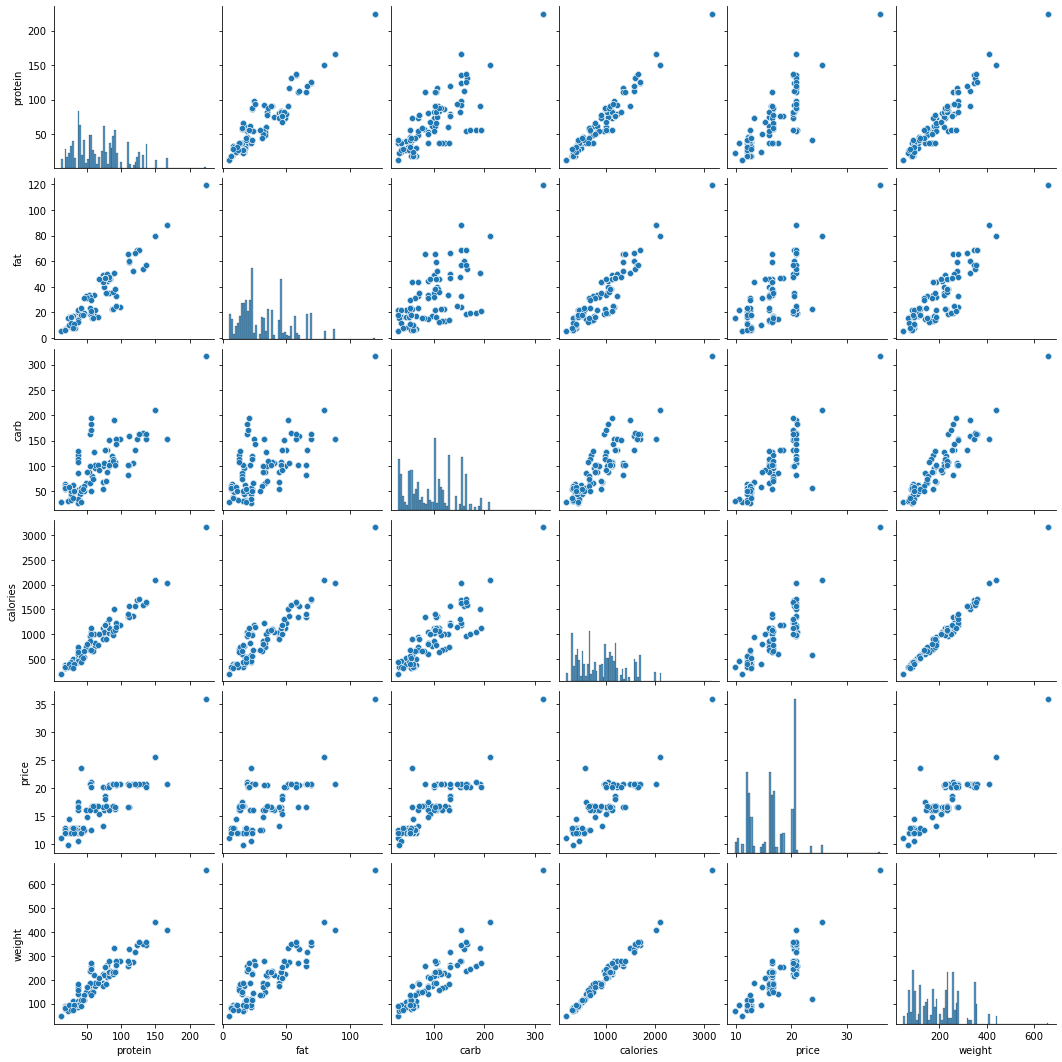

In [64]:
sns.pairplot(per_pizza_nutrition_df[['protein', 'fat', 'carb', 'calories', 'price', 'weight']])
plt.show()

# Distribution of protein for each pizza

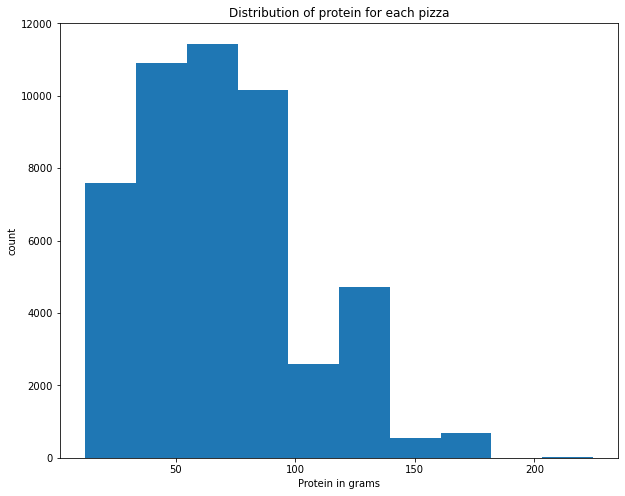

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of protein for each pizza')
plt.xlabel('Protein in grams')
plt.ylabel('count')
plt.hist(per_pizza_nutrition_df['protein'])
plt.show()

# Distribution of carbs for each pizza

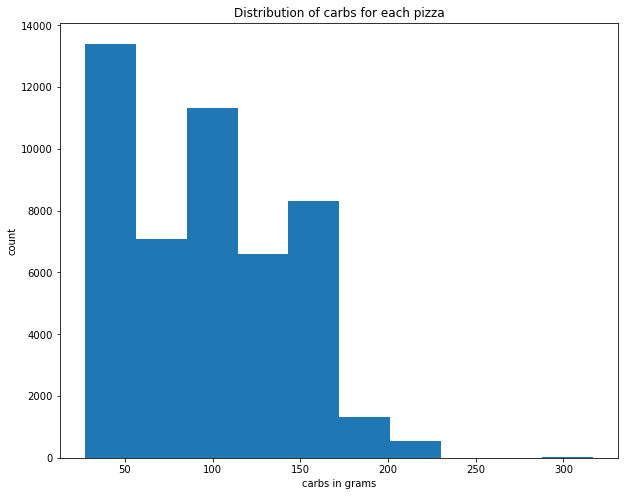

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Distribution of carbs for each pizza')
plt.xlabel('carbs in grams')
plt.ylabel('count')
plt.hist(per_pizza_nutrition_df['carb'])
plt.show()

# Distribution of calories for each pizza

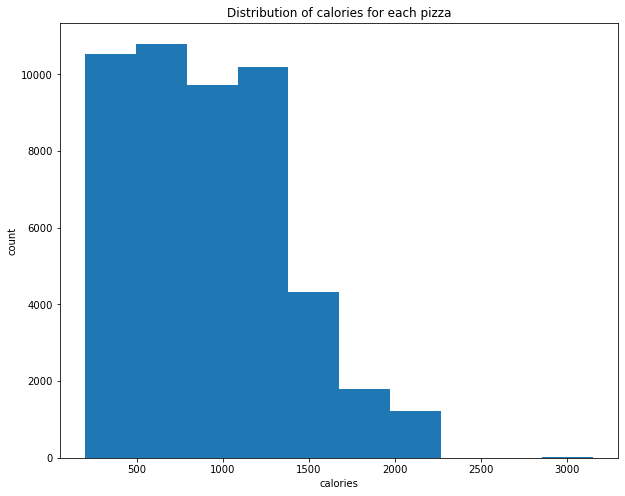

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of calories for each pizza')
plt.xlabel('calories')
plt.ylabel('count')
plt.hist(per_pizza_nutrition_df['calories'])
plt.show()

# Top 10 Best Selling Pizzas

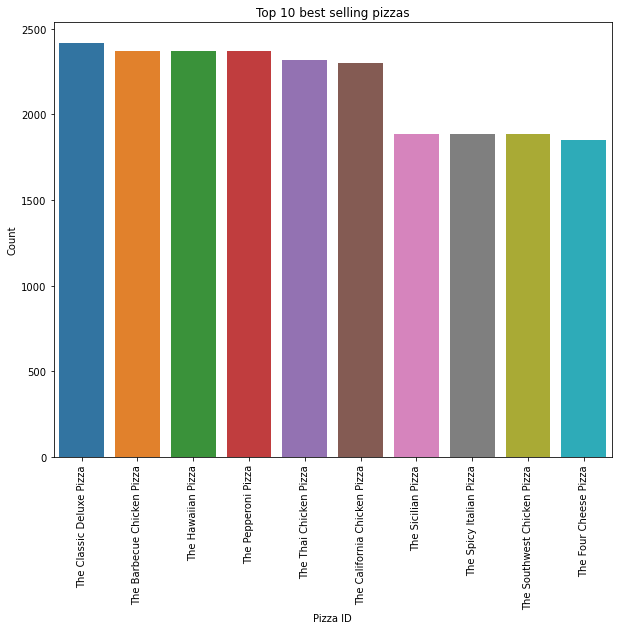

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
most_selling_pizzas = pd.DataFrame(per_pizza_nutrition_df['name'].value_counts()[:10]).reset_index()

sns.barplot(data=most_selling_pizzas, x='index', y='name')
plt.xticks(rotation=90)
plt.xlabel('Pizza ID')
plt.ylabel('Count')
plt.title("Top 10 best selling pizzas")
plt.show()

In [69]:
# Classifying pizzas as vegetatirian and non-vegetarian
veg_pizzas =['five_cheese','four_cheese','green_garden','ital_veggie','mediterraneo','mexicana','spin_pesto','spinach_fet','veggie_veg']

per_pizza_nutrition_df.loc[per_pizza_nutrition_df['pizza_id'].str[:-2].isin(veg_pizzas), ['Pizza_Type']] = 'Veg'
per_pizza_nutrition_df['Pizza_Type'].fillna('Non-Veg',inplace=True)
per_pizza_nutrition_df.head()

,order_details_id,protein,fat,carb,calories,size,name,pizza_id,order_time,price,category,weight,carb_%,protein_%,fat_%,Pizza_Type
0,1,73.740,43.836667,68.203333,936.0,m,The Hawaiian Pizza,hawaiian_m,2015-01-01 11:38:36,13.25,Classic,185.780000,36.711881,39.692109,23.596010,Non-Veg
4,2,54.948,23.296000,66.821333,682.0,m,The Classic Deluxe Pizza,classic_dlx_m,2015-01-01 11:57:40,16.00,Classic,145.065333,46.062923,37.878105,16.058971,Non-Veg
9,3,75.840,46.675000,132.215000,1192.5,l,The Five Cheese Pizza,five_cheese_l,2015-01-01 11:57:40,18.50,Veggie,254.730000,51.903977,29.772701,18.323323,Veg
12,4,136.185,57.180000,153.410000,1638.0,l,The Italian Supreme Pizza,ital_supr_l,2015-01-01 11:57:40,20.75,Supreme,346.775000,44.239060,39.271862,16.489078,Non-Veg
19,5,37.518,13.756000,129.331333,751.0,m,The Mexicana Pizza,mexicana_m,2015-01-01 11:57:40,16.00,Veggie,180.605333,71.609919,20.773473,7.616608,Veg


# which pizzas generate more venenue non-veg or veg

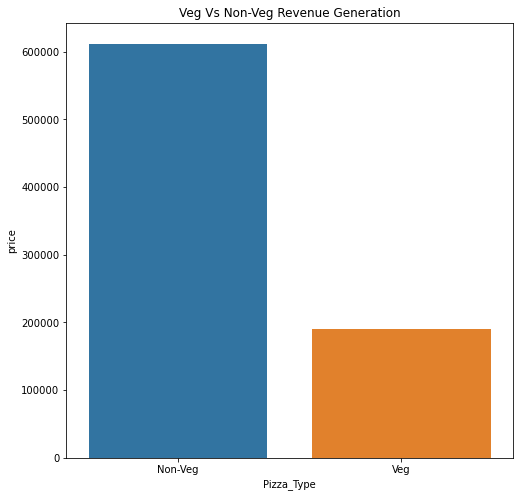

In [70]:
plt.figure(figsize=(8, 8))
plt.title('Veg Vs Non-Veg Revenue Generation')
veg_vs_nv_reveue = per_pizza_nutrition_df.groupby('Pizza_Type')['price'].sum()
veg_vs_nv_reveue = veg_vs_nv_reveue.reset_index()
sns.barplot(data=veg_vs_nv_reveue, x='Pizza_Type', y='price')
plt.show()

# Average percentage of protein a pizza contains(Veg&Non-Veg)

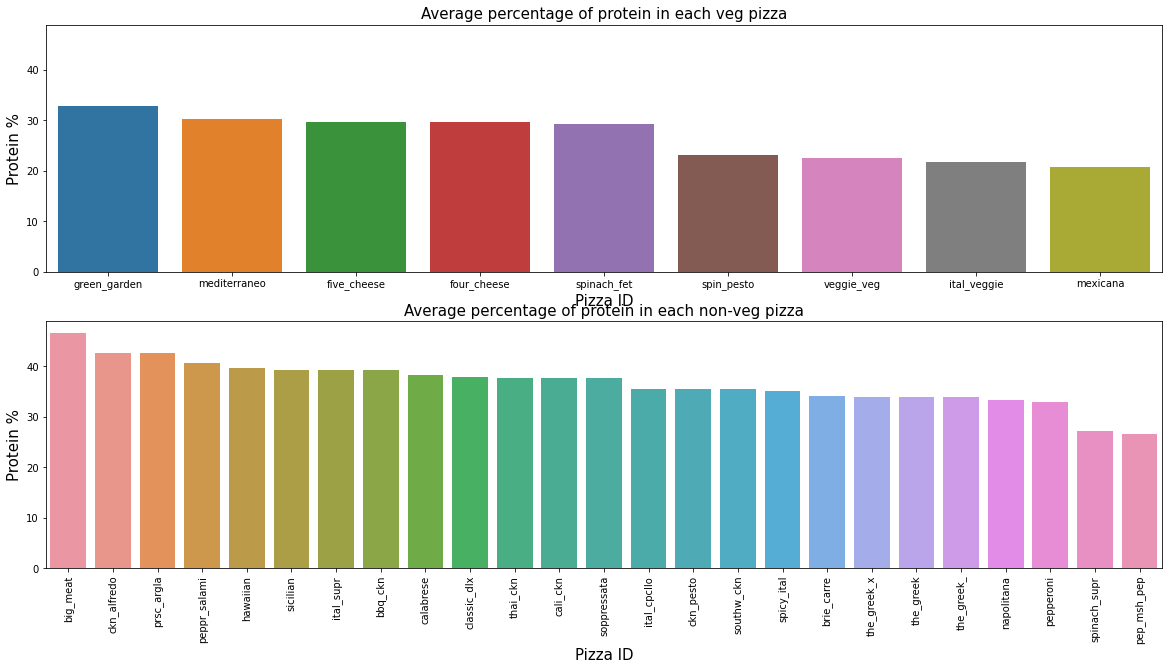

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharey=True)
veg_df = per_pizza_nutrition_df[per_pizza_nutrition_df['Pizza_Type']=='Veg']
veg_protein_mean =veg_df.groupby(veg_df['pizza_id'].str[:-2])['protein_%'].mean()
veg_protein_mean = veg_protein_mean.reset_index().sort_values(by=['protein_%'],ascending=False)

non_veg_df = per_pizza_nutrition_df[per_pizza_nutrition_df['Pizza_Type']=='Non-Veg']
non_veg_protein_mean =non_veg_df.groupby(non_veg_df['pizza_id'].str[:-2])['protein_%'].mean()
non_veg_protein_mean = non_veg_protein_mean.reset_index().sort_values(by=['protein_%'],ascending=False)
sns.barplot(data=veg_protein_mean,x='pizza_id',y='protein_%', ax=ax1)
sns.barplot(data=non_veg_protein_mean,x='pizza_id',y='protein_%', ax=ax2)

ax1.set_title('Average percentage of protein in each veg pizza',fontsize=15)
ax1.set_xlabel('Pizza ID',fontsize=15)
ax1.set_ylabel('Protein %',fontsize=15)



ax2.set_title('Average percentage of protein in each non-veg pizza',fontsize=15)
ax2.set_xlabel('Pizza ID',fontsize=15)
ax2.set_ylabel('Protein %',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Pizzas with least revenue

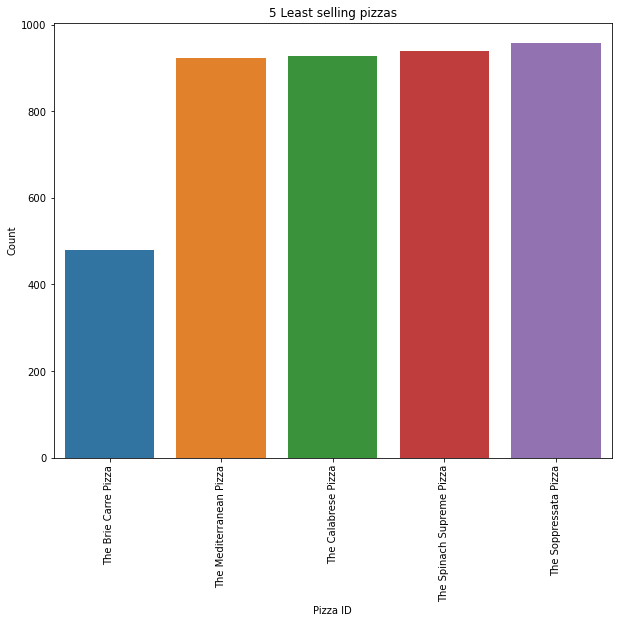

In [72]:
                                       
fig, ax = plt.subplots(figsize=(10, 8))
least_selling_pizzas = pd.DataFrame(per_pizza_nutrition_df['name'].value_counts()[-5:]).reset_index()

sns.barplot(data=least_selling_pizzas.sort_values(by=['name'],ascending=True), x='index', y='name')
plt.xticks(rotation=90)
plt.xlabel('Pizza ID')
plt.ylabel('Count')
plt.title("5 Least selling pizzas")
plt.show()

# Protein to Carbohydrate Ratio of Pizzas

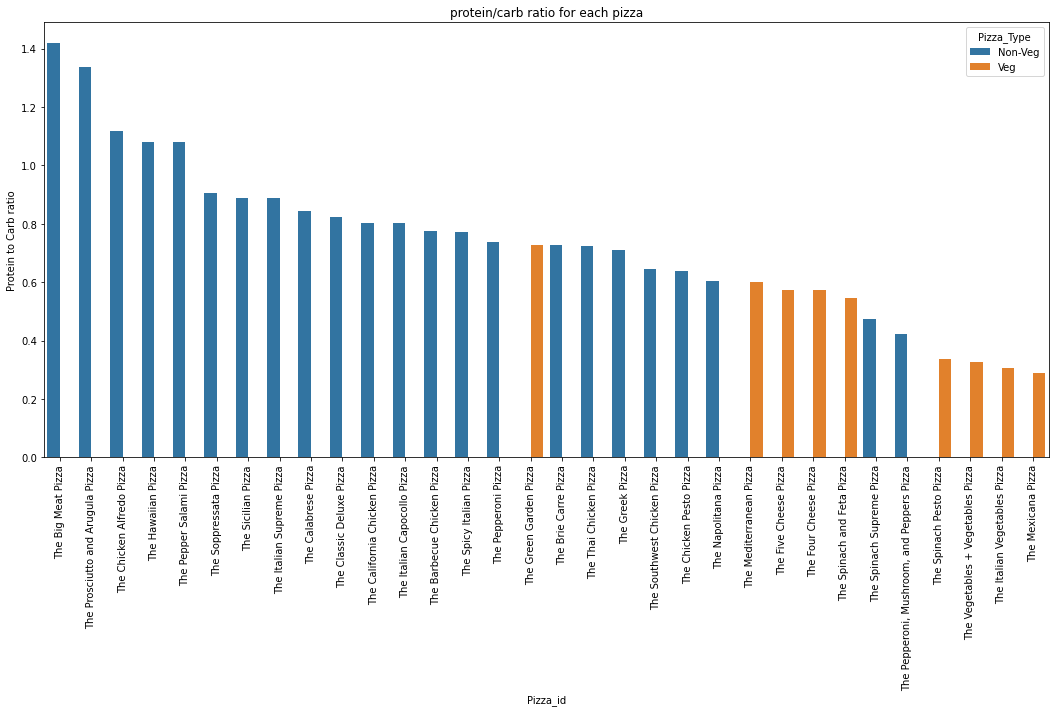

In [73]:
# Calculating carb to protein ratio
per_pizza_nutrition_df['protein_carb_ratio'] = per_pizza_nutrition_df['protein']/per_pizza_nutrition_df['carb']
per_pizza_nutrition_df.sort_values(by='protein_carb_ratio', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(data=per_pizza_nutrition_df, x='name', y='protein_carb_ratio', hue='Pizza_Type')
ax.set_title('protein/carb ratio for each pizza')
ax.set_xlabel('Pizza_id')
ax.set_ylabel('Protein to Carb ratio')
plt.xticks(rotation=90)
plt.show()

### Pizzas (veg/non-veg) at different times of the day

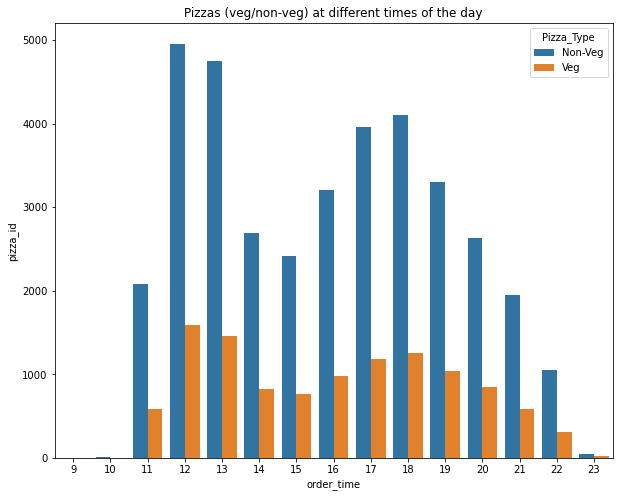

In [75]:
plt.figure(figsize=(10, 8))
plt.title("Pizzas (veg/non-veg) at different times of the day")
pizza_type_hour = per_pizza_nutrition_df.groupby([per_pizza_nutrition_df['order_time'].dt.hour, 'Pizza_Type'])['pizza_id'].count().reset_index()
sns.barplot(data = pizza_type_hour, x='order_time', y='pizza_id', hue='Pizza_Type')
plt.show()

In [76]:
per_pizza_nutrition_df['fat_to_carb_ratio'] = per_pizza_nutrition_df['fat']/per_pizza_nutrition_df['carb']

In [77]:
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

covariance = cov(per_pizza_nutrition_df['fat_to_carb_ratio'], per_pizza_nutrition_df['price'])

corr, _ = pearsonr(per_pizza_nutrition_df['fat_to_carb_ratio'], per_pizza_nutrition_df['price'])
print('Pearsons correlation: %.3f' % corr)
spearman_corr, _ = spearmanr(per_pizza_nutrition_df['fat_to_carb_ratio'], per_pizza_nutrition_df['price'])
print('spearman_corr: %.3f' % spearman_corr)

Pearsons correlation: -0.208
spearman_corr: -0.199


### There is a weak negative correlation between fat/carb ration and price

# Healthy pizzas

### A healthy diet consists of 45-65% carbohydrates, 20-35% fat and 10-35% protein

In [91]:
per_pizza_nutrition_df['healthy'] = 0

healthy_pizzas = per_pizza_nutrition_df[(per_pizza_nutrition_df['protein_%'] >= 10) & \
                       (per_pizza_nutrition_df['protein_%'] < 35) & \
                       (per_pizza_nutrition_df['fat_%'] >= 20) & \
                       (per_pizza_nutrition_df['fat_%'] < 35) & \
                       (per_pizza_nutrition_df['carb_%'] >= 45) & \
                       (per_pizza_nutrition_df['carb_%'] < 65)].index


# healthy pizzas
per_pizza_nutrition_df.loc[healthy_pizzas, 'healthy'] = 1

# top pizzas from this set
per_pizza_nutrition_df[per_pizza_nutrition_df['healthy'] == 1]['name'].unique()[0]

'The Green Garden Pizza'

# Monthly Revenue

In [79]:
month_name = per_pizza_nutrition_df['order_time'].dt.month_name().to_list()
month = per_pizza_nutrition_df['order_time'].dt.month.to_list()

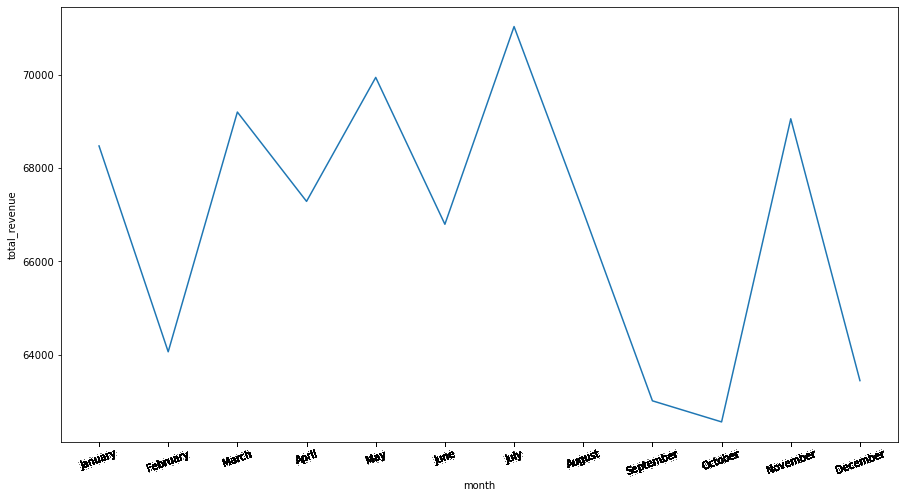

In [80]:
plt.figure(figsize=(15, 8))
plt.xticks(month, month_name, rotation=20)
monthly_sales = per_pizza_nutrition_df.groupby(per_pizza_nutrition_df['order_time'].dt.month)['price'].sum().reset_index()
monthly_sales.rename(columns={'order_time':'month', 'price':'total_revenue'}, inplace=True)
sns.lineplot(data=monthly_sales, x='month', y='total_revenue')
plt.show()

# statistical test

## T-Test

In [81]:
per_pizza_nutrition_df.head()

,order_details_id,protein,fat,carb,calories,size,name,pizza_id,order_time,price,category,weight,carb_%,protein_%,fat_%,Pizza_Type,protein_carb_ratio,fat_to_carb_ratio,healthy
101642,17290,41.069,18.058,28.939,433.5,s,The Big Meat Pizza,big_meat_s,2015-05-08 16:24:35,12.0,Classic,88.066,32.860582,46.634342,20.505076,Non-Veg,1.419158,0.624002,0
221556,37791,41.069,18.058,28.939,433.5,s,The Big Meat Pizza,big_meat_s,2015-10-09 16:47:24,12.0,Classic,88.066,32.860582,46.634342,20.505076,Non-Veg,1.419158,0.624002,0
267271,45555,41.069,18.058,28.939,433.5,s,The Big Meat Pizza,big_meat_s,2015-12-06 17:30:28,12.0,Classic,88.066,32.860582,46.634342,20.505076,Non-Veg,1.419158,0.624002,0
221702,37815,41.069,18.058,28.939,433.5,s,The Big Meat Pizza,big_meat_s,2015-10-09 18:16:10,12.0,Classic,88.066,32.860582,46.634342,20.505076,Non-Veg,1.419158,0.624002,0
93163,15848,41.069,18.058,28.939,433.5,s,The Big Meat Pizza,big_meat_s,2015-04-27 15:35:13,12.0,Classic,88.066,32.860582,46.634342,20.505076,Non-Veg,1.419158,0.624002,0


## Analysing mean `protein` for `supreme` and `chicken` category

## H0: Mean grams of `protein` is equal for `chicken` and `supreme`.

## Ha: Mean grams of `protein` not equal for `chicken` and `supreme`.

In [82]:
avg_protein = per_pizza_nutrition_df.groupby('category')['protein'].mean().reset_index()

In [92]:
from scipy.stats import ttest_ind_from_stats
np.random.seed(100)

device_1 = 'Chicken'
device_2 = 'Supreme'

size_1 = 30
sample_1 = np.random.choice(per_pizza_nutrition_df[per_pizza_nutrition_df['category'] == device_1]['protein'], size_1)
xbar_1 = sample_1.mean()
stddev_1 = sample_1.std()

size_2 = 40
sample_2 = np.random.choice(per_pizza_nutrition_df[per_pizza_nutrition_df['category'] == device_2]['protein'], size_2)
xbar_2 = sample_2.mean()
stddev_2 = sample_2.std()

z_statistic, p_value = ttest_ind_from_stats(xbar_1, stddev_1, size_1,
                                            xbar_2, stddev_2, size_2,
                                           equal_var=False)

print("p_value: {}".format(p_value))

alpha = 0.05
if(p_value/2 < alpha):
    print("Reject H0")
else:
    print("Cannot Reject H0")

p_value: 0.00785565767171038
Reject H0


## The Null hypothesis can be rejected. The mean protein from chicken category is different from supreme category

# Summary

## Challenges Faced
1. Normalizing the ingredients of the same category to one main format. For example, fried bacon and boiled bacon are considered bacon.
1. Difficulty in gathering accurate data for each ingredient.
1. Normalizing and calculating nutritional values for different sizes of pizzas.
1. Figuring out the ideal range for a holistic pizza with balanced nutrient values.
1. Scaling the nutritional information as per pizza size.

## Observations
1. Nonvegetarian pizzas sold more than vegetarian pizzas.
1. Peak pizza sales hours are from 11:30-1:00 pm and again from 4:30-6:00 pm.
1. `July` month has peak revenue from pizza sales.
1. `Green Garden Pizza` is the healthiest pizza of all the available pizzas.
1. The Big Meat pizza has the highest protein-to-carb ratio, which makes it suitable for athletes and body builders.